In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv("train.csv")

In [3]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2)

for train_indices, test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]) :
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set  = titanic_data.loc[test_indices]

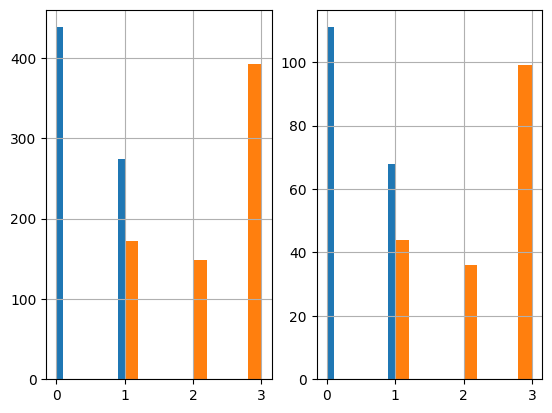

In [5]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

In [6]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 372 to 58
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]]).ravel()
        return X

In [8]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         # Initialize encoders
#         label_encoder = LabelEncoder()
#         one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        
#         if "Embarked" in X.columns:
#             embarked_column = X["Embarked"]
            
#             # Check unique values in the "Embarked" column
#             unique_values = embarked_column.unique()
#             print("Unique values in Embarked column:", unique_values)
            
#             # Perform label encoding on "Embarked" column
#             encoded_data = label_encoder.fit_transform(embarked_column)
            
#             # Perform one-hot encoding on the label encoded data
#             one_hot_encoded_data = one_hot_encoder.fit_transform(encoded_data.reshape(-1, 1))
            
#             # Generate column names for the encoded features
#             column_names = one_hot_encoder.get_feature_names_out(["Embarked"])
            
#             # Create new DataFrame with encoded features
#             embarked_encoded = pd.DataFrame(one_hot_encoded_data, columns=column_names, index=X.index)
            
#             # Concatenate the encoded features to the original DataFrame
#             X = pd.concat([X, embarked_encoded], axis=1)
        
#         if "Sex" in X.columns:
#             sex_column = X["Sex"]
            
#             # Perform label encoding on "Sex" column
#             encoded_data = label_encoder.fit_transform(sex_column)
            
#             # Perform one-hot encoding on the label encoded data
#             one_hot_encoded_data = one_hot_encoder.fit_transform(encoded_data.reshape(-1, 1))
            
#             # Generate column names for the encoded features
#             column_names = one_hot_encoder.get_feature_names_out(["Sex"])
            
#             # Create new DataFrame with encoded features
#             sex_encoded = pd.DataFrame(one_hot_encoded_data, columns=column_names, index=X.index)
            
#             # Concatenate the encoded features to the original DataFrame
#             X = pd.concat([X, sex_encoded], axis=1)
            
#         return X


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = LabelEncoder()
        
        if "Embarked" in X.columns:
            embarked_column = X["Embarked"]
            
            # Check unique values in the "Embarked" column
            unique_values = embarked_column.unique()
            print("Unique values in Embarked column:", unique_values)
            
            # Perform label encoding on "Embarked" column
            embarked_encoded = encoder.fit_transform(embarked_column)
            
            # Create new columns with the encoded values
            X["Embarked_C"] = (embarked_encoded == 0).astype(float)
            X["Embarked_S"] = (embarked_encoded == 1).astype(float)
            X["Embarked_Q"] = (embarked_encoded == 2).astype(float)
            X["Embarked_N"] = (embarked_encoded == 3).astype(float)

        if "Sex" in X.columns:
            sex_column = X["Sex"]
            
            # Perform label encoding on "Sex" column
            sex_encoded = encoder.fit_transform(sex_column)
            
            # Create new columns with the encoded values
            X["Sex_Male"] = (sex_encoded == 0).astype(float)
            X["Sex_Female"] = (sex_encoded == 1).astype(float)
            
        return X


In [10]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked","Embarked_N","Sex","Name","Ticket","Cabin","N"],axis=1,errors = "ignore")
#     def rename(self,X):
# #         X_pd=pd.Dataframe
#         return X.rename(columns = {'Embarked_0':'C','Embarked_2':'S','Embarked_1':'S','Sex_0':'Female','Sex_1':'Male'}, inplace = True)

In [11]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])


In [12]:
pipeline

Pipeline(steps=[('ageimputer', AgeImputer()),
                ('featureencoder', FeatureEncoder()),
                ('featuredropper', FeatureDropper())])

In [13]:
strat_train_set = pipeline.fit_transform(strat_train_set)

Unique values in Embarked column: ['S' 'C' 'Q' nan]


In [14]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Sex_Male,Sex_Female
372,373,0,3,19.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
165,166,1,3,9.000000,0,2,20.5250,0.0,0.0,1.0,0.0,1.0
492,493,0,1,55.000000,0,0,30.5000,0.0,0.0,1.0,0.0,1.0
373,374,0,1,22.000000,0,0,135.6333,1.0,0.0,0.0,0.0,1.0
559,560,1,3,36.000000,1,0,17.4000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
660,661,1,1,50.000000,2,0,133.6500,0.0,0.0,1.0,0.0,1.0
77,78,0,3,29.732285,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
659,660,0,1,58.000000,0,2,113.2750,1.0,0.0,0.0,0.0,1.0
799,800,0,3,30.000000,1,1,24.1500,0.0,0.0,1.0,1.0,0.0


In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 372 to 58
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked_C   712 non-null    float64
 8   Embarked_S   712 non-null    float64
 9   Embarked_Q   712 non-null    float64
 10  Sex_Male     712 non-null    float64
 11  Sex_Female   712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10,100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4]
}

grid_search= GridSearchCV(clf,param_grid,cv=3,scoring="accuracy", return_train_score=1)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=1, scoring='accuracy')

In [19]:
final_clf= grid_search.best_estimator_

In [20]:
final_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

In [21]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S


In [22]:
strat_test_set= pipeline.fit_transform(strat_test_set)

Unique values in Embarked column: ['S' 'C' 'Q' nan]


In [23]:
X_test = strat_test_set.drop(["Survived"],axis=1)
y_test = strat_test_set["Survived"]

In [24]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Sex_Male,Sex_Female
775,776,0,3,18.000000,0,0,7.7500,0.0,0.0,1.0,0.0,1.0
347,348,1,3,29.568966,1,0,16.1000,0.0,0.0,1.0,1.0,0.0
297,298,0,1,2.000000,1,2,151.5500,0.0,0.0,1.0,1.0,0.0
849,850,1,1,29.568966,1,0,89.1042,1.0,0.0,0.0,1.0,0.0
229,230,0,3,29.568966,3,1,25.4667,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,1,1,27.000000,0,0,76.7292,1.0,0.0,0.0,0.0,1.0
269,270,1,1,35.000000,0,0,135.6333,0.0,0.0,1.0,1.0,0.0
730,731,1,1,29.000000,0,0,211.3375,0.0,0.0,1.0,1.0,0.0
344,345,0,2,36.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0


In [25]:
scalar = StandardScaler()
X_data_test= scalar.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [26]:
final_clf.score(X_data_test,y_data_test)

0.8491620111731844

In [27]:
final_data = pipeline.fit_transform(titanic_data)

Unique values in Embarked column: ['S' 'C' 'Q' nan]


In [28]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Sex_Male,Sex_Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [29]:
X_final = final_data.drop(["Survived"],axis =1)
y_final = final_data["Survived"]

scalar = StandardScaler()
X_data_final= scalar.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [30]:
prod_clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10,100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4]
}

grid_search= GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy", return_train_score=1)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=1, scoring='accuracy')

In [31]:
prod_final_clf = grid_search.best_estimator_

In [32]:
titanic_test_data= pd.read_csv("test.csv")

In [33]:
final_test_data = pipeline.fit_transform(titanic_test_data)

Unique values in Embarked column: ['Q' 'S' 'C']


In [34]:
X_final_test= final_test_data
X_final_test= X_final_test.fillna(method="ffill")
scalar = StandardScaler()
X_data_final_test = scalar.fit_transform(X_final_test)

In [35]:
predictions = prod_final_clf.predict(X_data_final_test)

In [36]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"] = predictions

In [38]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
